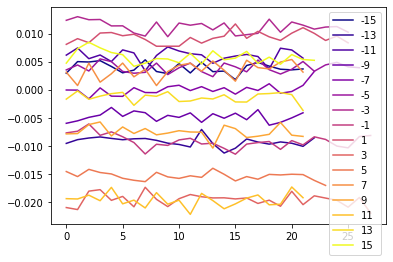

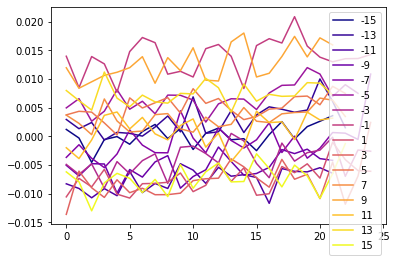

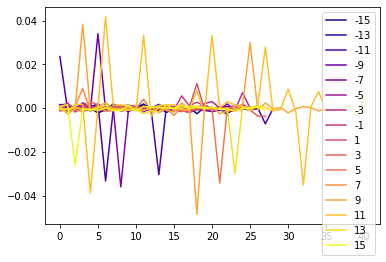

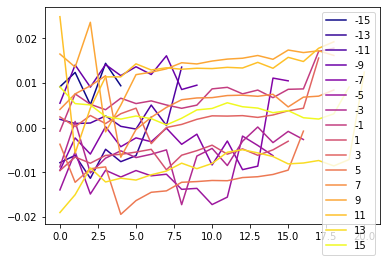

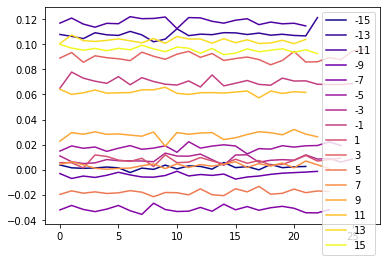

In [67]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx



laser_id_to_angle = {
    0: -15,
    1: 1,
    2: -13,
    3: 3,
    4: -11,
    5: 5,
    6: -9,
    7: 7,
    8: -7,
    9: 9,
    10: -5,
    11: 11,
    12: -3,
    13: 13,
    14: -1,
    15: 15
}
laser_angle_to_id = {y:x for x,y in laser_id_to_angle.items()}
sorted_angles_asc = sorted(laser_angle_to_id.keys())
sorted_ids_by_angle = [laser_angle_to_id[angle] for angle in sorted_angles_asc]

cm = plt.get_cmap('plasma') 
cNorm  = colors.Normalize(vmin=0, vmax=len(sorted_ids_by_angle)-1)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)


def plot_centroid_distances(filename):
    distances = [[] for _ in range(16)]
    current_id = -1
    # the centroid distances in this file should be sorted by the centroids z-coordinate
    with open(filename) as f:
        for line in f:
            if line.startswith("Laser id"):
                current_id = current_id + 1
            else:
                distances[current_id].append(float(line.rstrip("\n")))

    # try sorting by the angle
    for i, idx in enumerate(sorted_ids_by_angle):
        plt.plot(distances[idx][6:], label=laser_id_to_angle[idx], c=scalarMap.to_rgba(i))
    plt.legend()
    plt.show()



plot_centroid_distances("/home/brano/Projects/thesis/virtual_error_measurements/5m_various_errors_comparison/different_noise_mu_per_laser/5m_0_wall_centroids_sampled_error.txt")
plot_centroid_distances("/home/brano/Projects/thesis/virtual_error_measurements/5m_various_errors_comparison/different_noise_mu_per_laser_double_stddev/5m_0_wall_centroids.txt")

plot_centroid_distances("/home/brano/Projects/thesis/virtual_error_measurements/5m_various_errors_comparison/centroids_sample_virtual.txt")

plot_centroid_distances("/home/brano/Projects/thesis/virtual_error_measurements/5m_various_errors_comparison/centroids_wall_real.txt")
plot_centroid_distances("/home/brano/Projects/thesis/virtual_error_measurements/5m_various_errors_comparison/different_noise_mu_per_laser/5m_0_wall_centroids_default_error.txt")


[0, 2, 4, 6, 8, 10, 12, 14, 1, 3, 5, 7, 9, 11, 13, 15]